## Importing the necessary libraries ##

In [1]:
# Data processing
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import zeros

# Machine Learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf
from tensorflow.keras import preprocessing as kprocessing
from tensorflow.keras import models, layers, optimizers

##import transformers

# Visualization
import matplotlib
from matplotlib import pyplot as plt

# Text processing
import re
import nltk
import gensim
import gensim.downloader as api

# Various
from datetime import datetime

# Showing the versions used
print('Pandas version: {}'.format(pd.__version__))
print('Numpy version: {}'.format(np.__version__))
print('PyPlot version: {}'.format(matplotlib.__version__))
print('Scikit Learn version: {}'.format(sklearn.__version__))
print('Tensorflow version: {}'.format(tf.__version__))
##print('Transformers version: {}'.format(transformers.__version__))
print('Regex version: {}'.format(re.__version__))
print('NLTK version: {}'.format(nltk.__version__))
print('Gensim version: {}'.format(gensim.__version__))

C:\Users\JU486WK\Anaconda2\envs\py37_test\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\JU486WK\Anaconda2\envs\py37_test\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\JU486WK\Anaconda2\envs\py37_test\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\JU486WK\Anaconda2\envs\py37_test\lib\site-pack

Pandas version: 1.1.5
Numpy version: 1.21.6
PyPlot version: 3.3.2
Scikit Learn version: 0.23.2
Tensorflow version: 1.13.1
Regex version: 2.2.1
NLTK version: 3.7
Gensim version: 4.0.1


C:\Users\JU486WK\Anaconda2\envs\py37_test\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [135]:
import transformers
##transformers.__version__

In [136]:
!pip install transformers==3.5.1

ERROR: Could not find a version that satisfies the requirement sacremoses (from transformers) (from versions: none)
ERROR: No matching distribution found for sacremoses


In [ ]:
print(torch.__version__)

In [ ]:
import torch
print(torch.__version__)

In [ ]:
!pip install torch

In [2]:
import warnings
warnings.filterwarnings("ignore")
##from nlp_utils import *

## for data
import json
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for processing
import re
import nltk
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
## for explainer
##from lime import lime_text
## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## for bert language model
##import transformers

In [3]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
##nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

# hide warnings
import warnings
warnings.filterwarnings('ignore')


# set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import EarlyStopping
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Using TensorFlow backend.


## Loading the data ##

In [5]:
# Opening JSON file 
f = open('C:/Users/JU486WK/OneDrive - EY/Desktop/Text Classification/complaints-2021-05-14_08_16.json') 
# returns JSON object as  
# a dictionary 
data = json.load(f)
df=pd.json_normalize(data)

In [6]:
df.shape

(78313, 22)

In [7]:
df = df.sample(1000)

In [8]:
df.shape

(1000, 22)

## Data Preparation ##

In [9]:
df.head(5)

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,_source.consumer_disputed,_source.product,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
76827,complaint-public-v2,complaint,2884326,0.0,None,02324,2884326,Problem with a credit reporting company's inve...,2018-04-23T12:00:00-05:00,MA,N/A,Student loan,Closed with explanation,JPMORGAN CHASE & CO.,Web,2018-04-23T12:00:00-05:00,None,Private student loan,Yes,,Their investigation did not fix an error on yo...,Consent not provided
10632,complaint-public-v2,complaint,3614829,0.0,None,94110,3614829,Other transaction problem,2020-04-20T12:00:00-05:00,CA,N/A,"Money transfer, virtual currency, or money ser...",Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2020-04-20T12:00:00-05:00,None,Domestic (US) money transfer,Yes,,None,Consent not provided
66726,complaint-public-v2,complaint,1538603,0.0,None,89122,1538603,Using a debit or ATM card,2015-08-26T12:00:00-05:00,NV,No,Bank account or service,Closed with explanation,JPMORGAN CHASE & CO.,Web,2015-08-26T12:00:00-05:00,None,Other bank product/service,Yes,,None,Consent not provided
24793,complaint-public-v2,complaint,3706039,0.0,None,913XX,3706039,Trouble during payment process,2020-06-19T12:00:00-05:00,CA,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2020-07-01T12:00:00-05:00,None,Conventional home mortgage,Yes,In XX/XX/XXXX I filed for a Chapter XXXX Bankr...,None,Consent provided
77974,complaint-public-v2,complaint,209956,0.0,Servicemember,060XX,209956,Settlement process and costs,2012-12-13T12:00:00-05:00,CT,No,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Phone,2012-12-17T12:00:00-05:00,None,VA mortgage,Yes,,None,N/A


In [10]:
#print the column names
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [11]:
## Assign new column names ##
df = df[['_source.complaint_what_happened','_source.product','_source.sub_product',]]
df.head()

,_source.complaint_what_happened,_source.product,_source.sub_product
76827,,Student loan,Private student loan
10632,,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer
66726,,Bank account or service,Other bank product/service
24793,In XX/XX/XXXX I filed for a Chapter XXXX Bankr...,Mortgage,Conventional home mortgage
77974,,Mortgage,VA mortgage


In [12]:
# lets rename the column names to be more read friendly
# we have retained product and sub_product only for verification purpose ,
# these columns will not be used in the Topic modelling
df = df.rename(columns={'_source.complaint_what_happened': 'complaint_text', '_source.product': 'category','_source.sub_product': 'sub_category'})
df.head()

,complaint_text,category,sub_category
76827,,Student loan,Private student loan
10632,,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer
66726,,Bank account or service,Other bank product/service
24793,In XX/XX/XXXX I filed for a Chapter XXXX Bankr...,Mortgage,Conventional home mortgage
77974,,Mortgage,VA mortgage


In [13]:
# lets merge the category and sub-category this will help us in deciding the topics after NMF modelling
df['category'] = df['category'] + '+' + df['sub_category']
df = df.drop(['sub_category'],axis= 1)
df.head()

,complaint_text,category
76827,,Student loan+Private student loan
10632,,"Money transfer, virtual currency, or money ser..."
66726,,Bank account or service+Other bank product/ser...
24793,In XX/XX/XXXX I filed for a Chapter XXXX Bankr...,Mortgage+Conventional home mortgage
77974,,Mortgage+VA mortgage


In [14]:
# lets check the nan complaints
df.complaint_text.isnull().sum()

0

In [15]:
# lets check the empty string complaints
len(df[df['complaint_text']==''])

711

In [16]:
#Assign nan in place of blanks in the complaints column
# lets replace empty complain with nan value
df[df['complaint_text']==''] = np.nan
df.complaint_text.isnull().sum()

711

In [17]:
#Remove all rows where complaints column is nan
# Lets drop all the rows where complaint_text is null
df = df[~df['complaint_text'].isnull()]
df.complaint_text.isnull().sum()

0

In [18]:
df.head()

,complaint_text,category
24793,In XX/XX/XXXX I filed for a Chapter XXXX Bankr...,Mortgage+Conventional home mortgage
76965,I am writing because I noticed that my report ...,"Credit reporting, credit repair services, or o..."
34725,On XX/XX/XXXX I was sent a letter from Chase s...,Credit card or prepaid card+General-purpose cr...
29803,I was billed by an automated fuel dispenser fo...,NaN
24476,My Chase credit card was overcharged for the a...,Credit card or prepaid card+General-purpose cr...


In [19]:
df['category'].isnull().sum()

31

In [20]:
df= df.dropna(axis=0)

In [21]:
df

,complaint_text,category
24793,In XX/XX/XXXX I filed for a Chapter XXXX Bankr...,Mortgage+Conventional home mortgage
76965,I am writing because I noticed that my report ...,"Credit reporting, credit repair services, or o..."
34725,On XX/XX/XXXX I was sent a letter from Chase s...,Credit card or prepaid card+General-purpose cr...
24476,My Chase credit card was overcharged for the a...,Credit card or prepaid card+General-purpose cr...
5488,"As attached document illustrates, I currently ...",Mortgage+Conventional home mortgage
5164,I sent in a payment in full to the wrong addre...,"Credit reporting, credit repair services, or o..."
1065,I have asked Chase Bank REPEATEDLY not to let ...,Checking or savings account+Checking account
20461,I took out credit card as a stupid college stu...,Debt collection+Credit card
24395,BOTH instacart & shipt have charged me each {$...,Credit card or prepaid card+General-purpose cr...
7102,I am a XXXX year old Private client of XXXX fo...,"Credit reporting, credit repair services, or o..."


## Prepare data ##

In [22]:
'''
1.Some algorithms (RNN and based on BERT) are fed with the original text. But for the TF-IDF algorithm we need to pre-process the data.

2.We pre-process the data with the help of specialized libraries. We introduce a function that will allow to:

3.convert to lower cases, remove special characters, ...
4.tokenize (i.e. convert from strings to lists of words)
5.remove stopwords (i.e. remove common words that bring noise to the system, like 'a', 'the', ...)
6.stemm (i.e. remove -ing, -ly, ..., like convert 'making' to 'make', so that words with same meaning are identified as being the same)
7. lemmatize (i.e convert the word into a root word, for example 'feet' becomes 'foot')
'''

"\n1.Some algorithms (RNN and based on BERT) are fed with the original text. But for the TF-IDF algorithm we need to pre-process the data.\n\n2.We pre-process the data with the help of specialized libraries. We introduce a function that will allow to:\n\n3.convert to lower cases, remove special characters, ...\n4.tokenize (i.e. convert from strings to lists of words)\n5.remove stopwords (i.e. remove common words that bring noise to the system, like 'a', 'the', ...)\n6.stemm (i.e. remove -ing, -ly, ..., like convert 'making' to 'make', so that words with same meaning are identified as being the same)\n7. lemmatize (i.e convert the word into a root word, for example 'feet' becomes 'foot')\n"

In [23]:
# Reference: Text Classification with NLP: Tf-Idf vs Word2Vec vs BERT from Medium

# Use stopwords list from nltk (that is used in the function below)
lst_stopwords = nltk.corpus.stopwords.words("english")

def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    # Clean (convert to lowercase and remove punctuations and characters and then strip)
    # The function is not optimized for speed but split into various steps for pedagogical purpose
    text = str(text).lower()
    text = text.strip()
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize (convert from string to list)
    lst_text = text.split()
    # remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in lst_stopwords]

    # Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]

    # Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]

    # back to string from list
    text = " ".join(lst_text)
    return text

In [24]:
# Let's apply this function to the whole corpus
df["text_clean"] = df["complaint_text"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))

# Let's look at the output
df.head()

,complaint_text,category,text_clean
24793,In XX/XX/XXXX I filed for a Chapter XXXX Bankr...,Mortgage+Conventional home mortgage,xxxxxxxx filed chapter xxxx bankruptcy order r...
76965,I am writing because I noticed that my report ...,"Credit reporting, credit repair services, or o...",writing noticed report reflecting late payment...
34725,On XX/XX/XXXX I was sent a letter from Chase s...,Credit card or prepaid card+General-purpose cr...,xxxxxxxx sent letter chase saying autopay cred...
24476,My Chase credit card was overcharged for the a...,Credit card or prepaid card+General-purpose cr...,chase credit card overcharged amount 43000 xxx...
5488,"As attached document illustrates, I currently ...",Mortgage+Conventional home mortgage,attached document illustrates currently arm mo...


In [25]:
## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis ##
df['text_clean'] = df['text_clean'].str.replace('xxxx','')

In [26]:
#All masked texts has been removed
df_clean = df.copy()

In [27]:
df_clean

,complaint_text,category,text_clean
24793,In XX/XX/XXXX I filed for a Chapter XXXX Bankr...,Mortgage+Conventional home mortgage,filed chapter bankruptcy order reorganize fi...
76965,I am writing because I noticed that my report ...,"Credit reporting, credit repair services, or o...",writing noticed report reflecting late payment...
34725,On XX/XX/XXXX I was sent a letter from Chase s...,Credit card or prepaid card+General-purpose cr...,sent letter chase saying autopay credit card ...
24476,My Chase credit card was overcharged for the a...,Credit card or prepaid card+General-purpose cr...,chase credit card overcharged amount 43000 13...
5488,"As attached document illustrates, I currently ...",Mortgage+Conventional home mortgage,attached document illustrates currently arm mo...
5164,I sent in a payment in full to the wrong addre...,"Credit reporting, credit repair services, or o...",sent payment full wrong address via mail came ...
1065,I have asked Chase Bank REPEATEDLY not to let ...,Checking or savings account+Checking account,asked chase bank repeatedly let anyone account...
20461,I took out credit card as a stupid college stu...,Debt collection+Credit card,took credit card stupid college student card h...
24395,BOTH instacart & shipt have charged me each {$...,Credit card or prepaid card+General-purpose cr...,instacart shipt charged 9900 yearly membership...
7102,I am a XXXX year old Private client of XXXX fo...,"Credit reporting, credit repair services, or o...",year old private client 26 year previously p...


## Split into Train and Test Data ##

In [28]:
# Renaming, Input -> X, Output -> y
X = df['text_clean']
y = df['category']

In [29]:
df.isnull().sum()

complaint_text    0
category          0
text_clean        0
dtype: int64

In [30]:

# Split into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## TF - IDF model ##

In [31]:
'''
The TF-IDF model (Term Frequency - Inverse Document Frequency) models a text by counting how often a word (called uni-gram), or a combination of two words (two successive words, called bi-gram), or even more (n-gram), appears in the text. This leads to the "term frequency". It is then divided by the document frequency, which counts how often a word appears across all entries (i.e. all documents). The last step allows to underweight words which appear more often, and overweight words which appear rarely.

The TF-IDF model does not take into account the order of the words (except for two successive words) and belongs therefore to the family of models called "Bag of Words". We will see later models which take the order of words into account.

To convert text into this format, we "vectorize" the text into a vector. When doing this we specify the size of the vocabulary (i.e. the total number of words taken into consideration), and the n-gram range. Then a word (and a word pair in case of bi-grams) is represented by a vector of the size of the vocabulary and has values in only one element, the others being all zero. This is called a one-hot vector.

After having initialized the vectorizer, we fit it on the entire training set.
'''

'\nThe TF-IDF model (Term Frequency - Inverse Document Frequency) models a text by counting how often a word (called uni-gram), or a combination of two words (two successive words, called bi-gram), or even more (n-gram), appears in the text. This leads to the "term frequency". It is then divided by the document frequency, which counts how often a word appears across all entries (i.e. all documents). The last step allows to underweight words which appear more often, and overweight words which appear rarely.\n\nThe TF-IDF model does not take into account the order of the words (except for two successive words) and belongs therefore to the family of models called "Bag of Words". We will see later models which take the order of words into account.\n\nTo convert text into this format, we "vectorize" the text into a vector. When doing this we specify the size of the vocabulary (i.e. the total number of words taken into consideration), and the n-gram range. Then a word (and a word pair in cas

In [32]:
corpus = X_train
# Initizalize the vectorizer with max nr words and ngrams (1: single words, 2: two words in a row)
vectorizer_tfidf = TfidfVectorizer(max_features=15000, ngram_range=(1,2))
# Fit the vectorizer to the training data
vectorizer_tfidf.fit(corpus)

TfidfVectorizer(max_features=15000, ngram_range=(1, 2))

In [33]:
'''
Let's build the model. After an entry is converted to a vector using the vectorizer, we apply an algorithm that minimizes the error, i.e. the output predicted by the model y(X) should be as often as possible equal to the label y.

We use the logistics regression. Other models could also be applied (like SVM, Naive Bayes, ...).

We build the model as a pipeline, consisting of:

vectorization
classifier
After initialization of the model, we fit it to the training data.
'''

"\nLet's build the model. After an entry is converted to a vector using the vectorizer, we apply an algorithm that minimizes the error, i.e. the output predicted by the model y(X) should be as often as possible equal to the label y.\n\nWe use the logistics regression. Other models could also be applied (like SVM, Naive Bayes, ...).\n\nWe build the model as a pipeline, consisting of:\n\nvectorization\nclassifier\nAfter initialization of the model, we fit it to the training data.\n"

In [34]:
classifier_tfidf = LogisticRegression()
model_tfidf = Pipeline([("vectorizer", vectorizer_tfidf), ("classifier", classifier_tfidf)])

start_time = datetime.now()
model_tfidf.fit(X_train, y_train)
end_time = datetime.now()

training_time_tfidf = (end_time - start_time).total_seconds()

In [35]:
'''
After the model is trained, we assess the accuracy of the model by comparing the predictions of the model to the labels for both the training and the test data. We compare it for both as the difference between the two accuracies is an important indicator of overfitting (i.e. the model is too strongly fitted to the training data).

We also look at the duration of the training.
'''

'\nAfter the model is trained, we assess the accuracy of the model by comparing the predictions of the model to the labels for both the training and the test data. We compare it for both as the difference between the two accuracies is an important indicator of overfitting (i.e. the model is too strongly fitted to the training data).\n\nWe also look at the duration of the training.\n'

In [36]:
predicted_train_tfidf = model_tfidf.predict(X_train)
accuracy_train_tfidf = accuracy_score(y_train, predicted_train_tfidf)
print('Accuracy Training data: {:.1%}'.format(accuracy_train_tfidf))

predicted_test_tfidf = model_tfidf.predict(X_test)
accuracy_test_tfidf = accuracy_score(y_test, predicted_test_tfidf)
accuracy_tfidf = accuracy_test_tfidf
print('Accuracy Test data: {:.1%}'.format(accuracy_test_tfidf))

print('Training time: {:.1f}s'.format(training_time_tfidf))

Accuracy Training data: 58.9%
Accuracy Test data: 42.3%
Training time: 3.8s


## Model Interpretation ##

In [37]:
print('Classes of the model: ',classifier_tfidf.classes_)
print(80*'-')
print('Shape of the coefficients of the model (categories x vocabulary size): ',classifier_tfidf.coef_.shape)
print(80*'-')
NN = 10
# Get the 10 (here: NN, which you can adjust yourself) ids of the words with highest weights per category
top_words = np.argsort(classifier_tfidf.coef_,axis=1)[:,-NN:]

# Get the vocabulary of the model (mapping of words to ids):
voc = vectorizer_tfidf.vocabulary_
# Get the inverse vocabulary to map the ids of the words to the words:
inv_voc = {v: k for k, v in voc.items()}

# Get for each category (=class) the top ten words
for n, w in enumerate(classifier_tfidf.classes_):
    t = w + ': '
    for i in range(NN):
        t += inv_voc[top_words[n,i]]
        if i!=NN:
            t+=', '
    print(t)
    print(80*'-')

Classes of the model:  ['Bank account or service+Cashing a check without an account'
 'Bank account or service+Checking account'
 'Bank account or service+Other bank product/service'
 'Bank account or service+Savings account'
 'Checking or savings account+CD (Certificate of Deposit)'
 'Checking or savings account+Checking account'
 'Checking or savings account+Other banking product or service'
 'Checking or savings account+Savings account'
 'Consumer Loan+Vehicle loan'
 'Credit card or prepaid card+General-purpose credit card or charge card'
 'Credit reporting, credit repair services, or other personal consumer reports+Credit reporting'
 'Debt collection+Credit card' 'Debt collection+Credit card debt'
 'Money transfer, virtual currency, or money service+Domestic (US) money transfer'
 'Money transfer, virtual currency, or money service+International money transfer'
 'Money transfer, virtual currency, or money service+Mobile or digital wallet'
 'Money transfer, virtual currency, or money

## Deep learning RNN ##

In [38]:
## 

In [39]:
'''
Words appear in a text in a given order. Recurrent Neural Networks (RNN) are models which take the order of words into account, by processing words sequentially, as they appear in the text. It was observed that RNNs, without any "internal memory", have a limitation regarding "how far they can remember" the effect of correlations between words. To mitigate this, Long Short Term Memory (LSTM) cells replaced the traditional RNNs in Machine Learning. The LSTM cells have internal variables which act as a memory. It comes at a slightly higher computational costs, which is typically acceptable.

In the building of this model, we take advantage of word embeddings, applying Word2Vec. This is a technique that was published in 2013 [1] and had a considerable impact in NLP. It consists of describing a word with a vector of a given size (typically 100 or 300). The vector for a given word is defined by its context within texts (i.e. based on words on its left and its right - N words on the left, N words on the right, N being typically 5). Typically, word embeddings is trained on huge text corpuses. Word2Vec was trained on millions of Google News, while a similar technique called GloVe was trained on Wikipedia. Words with similar meanings (synonyms) are typically close to each other in this space of words. The representation is "dense", compared to the one-hot vector representation, which is "sparse".

The sequential approach of RNN enables to take the order of words into account, but at the same time slows down the training, since a sequential approach by design cannot be handled by parallel computing.

Training and test data is defined in a different way than for TF-IDF: we will use the non-processed text. The labelling cannot be handled as text but has to be converted into a one-hot vector, because of technical reasons (to the best of my knowledge, this is simply not implemented in TensorFlow). Then we split into training and test data, same as we did for TF-IDF.
'''

'\nWords appear in a text in a given order. Recurrent Neural Networks (RNN) are models which take the order of words into account, by processing words sequentially, as they appear in the text. It was observed that RNNs, without any "internal memory", have a limitation regarding "how far they can remember" the effect of correlations between words. To mitigate this, Long Short Term Memory (LSTM) cells replaced the traditional RNNs in Machine Learning. The LSTM cells have internal variables which act as a memory. It comes at a slightly higher computational costs, which is typically acceptable.\n\nIn the building of this model, we take advantage of word embeddings, applying Word2Vec. This is a technique that was published in 2013 [1] and had a considerable impact in NLP. It consists of describing a word with a vector of a given size (typically 100 or 300). The vector for a given word is defined by its context within texts (i.e. based on words on its left and its right - N words on the left

In [40]:
# Renaming, Input -> X, Output -> y
X_tf = df['text_clean']
y_tf_class = df['category']



In [41]:
len(df['category'].unique())

30

In [42]:
# Convert labels into a one-hot vector of size 5 (the number of distinct labels)
lab = LabelBinarizer()
lab.fit(y_tf_class)
y_tf = lab.transform(y_tf_class)

# Example (you can modify n)
#n=100
#print('Coding of labels into a one-hot vector: ' + y_tf_class[n] + ' is ', y_tf[n])

# Split into training and test data
X_tf_train, X_tf_test, y_tf_train, y_tf_test = train_test_split(X_tf, y_tf, test_size=0.3, random_state=42)

In [43]:
corpus = X_tf_train
max_words = 15000
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', num_words=max_words, oov_token="<pad>", filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(corpus)
voc = tokenizer.word_index
reverse_voc = dict([(value, key) for (key, value) in voc.items()])

In [44]:
max_len = 1000

sequences = tokenizer.texts_to_sequences(X_tf_train)
X_tf_train_seq = kprocessing.sequence.pad_sequences(sequences, maxlen=max_len)

# Apply the same to test data
X_tf_test_seq = kprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(X_tf_test), maxlen=max_len)

n=10 # You can adjust n
print('Shape: ',X_tf_train_seq.shape)
print(100*'-')
print('Example: ',X_tf_train_seq[n,:])

Shape:  (180, 1000)
----------------------------------------------------------------------------------------------------
Example:  [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0  

In [45]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.100d.txt',encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [46]:
# create a weight matrix for words in training docs
embedding_matrix = zeros((max_words+1, 100))
for i in range(max_words):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [47]:
input_ = layers.Input(shape = X_tf_train_seq[0,:].shape,name='input')

In [51]:
input_ = layers.Input(shape = X_tf_train_seq[0,:].shape,name='input')
x = layers.Embedding(max_words+1,weights=[embedding_matrix],trainable=False, name='embedding',output_dim=100)(input_)
x = layers.Bidirectional(layers.LSTM(15,dropout=0.2),name='bidirectional-lstm')(x) # LSTM layer
x = layers.Dropout(0.2, name='dropout')(x)
x = layers.Dense(64, activation='relu',name='dense')(x)
output = layers.Dense(30,activation='softmax', name='classification')(x)

model = models.Model(input_, output)

opt = optimizers.Adam(lr=0.01, beta_1=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 1000)              0         
_________________________________________________________________
embedding (Embedding)        (None, 1000, 100)         1500100   
_________________________________________________________________
bidirectional-lstm (Bidirect (None, 30)                13920     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1984      
_________________________________________________________________
classification (Dense)       (None, 30)                1950      
Total params: 1,517,954
Trainable params: 17,854
Non-trainable params: 1,500,100
_____________________________________________________________

In [53]:
start_time = datetime.now()
history = model.fit(X_tf_train_seq, y_tf_train, batch_size=64, shuffle=True, epochs=10, validation_data=(X_tf_test_seq, y_tf_test))
end_time = datetime.now()
training_time_rnn = (end_time - start_time).total_seconds()

Train on 180 samples, validate on 78 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
180/180 [==============================] - 10s 53ms/sample - loss: 3.2061 - acc: 0.0667 - val_loss: 2.8777 - val_acc: 0.2692
Epoch 2/10
180/180 [==============================] - 7s 37ms/sample - loss: 2.6576 - acc: 0.2278 - val_loss: 2.8250 - val_acc: 0.2692
Epoch 3/10
180/180 [==============================] - 8s 43ms/sample - loss: 2.6537 - acc: 0.1667 - val_loss: 2.7556 - val_acc: 0.1923
Epoch 4/10
180/180 [==============================] - 8s 42ms/sample - loss: 2.5926 - acc: 0.2111 - val_loss: 2.6818 - val_acc: 0.2692
Epoch 5/10
180/180 [==============================] - 9s 53ms/sample - loss: 2.5708 - acc: 0.2556 - val_loss: 2.6825 - val_acc: 0.2692
Epoch 6/10
180/180 [==============================] - 8s 45ms/sample - loss: 2.5704 - acc: 0.2500 - val_loss: 2.6906 - val_acc: 0.2692
Epoch 7/10
180/180 [==============================] - 8s 46ms/sample - loss: 2.5627 - acc: 0.250

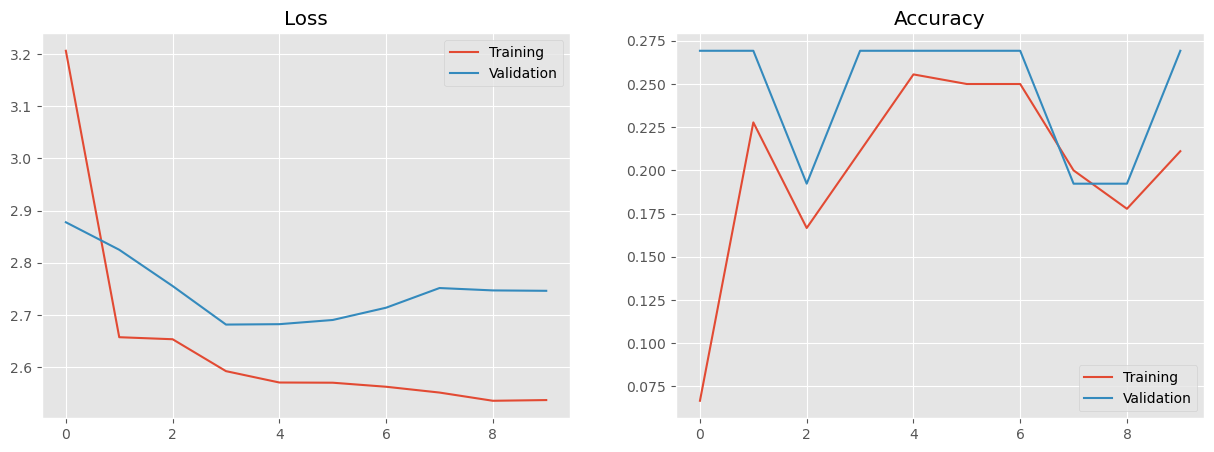

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].set(title='Loss')
ax[0].plot(history.history['loss'], label='Training')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].legend(loc="upper right")

ax[1].set(title='Accuracy')
ax[1].plot(history.history['acc'], label='Training')
ax[1].plot(history.history['val_acc'], label='Validation')
ax[1].legend(loc="lower right")

In [55]:
accuracy_rnn = history.history['val_acc'][-1]
print('Accuracy Training data: {:.1%}'.format(history.history['acc'][-1]))
print('Accuracy Test data: {:.1%}'.format(history.history['val_acc'][-1]))
print('Training time: {:.1f}s'.format(training_time_rnn))

Accuracy Training data: 21.1%
Accuracy Test data: 26.9%
Training time: 94.7s


## Deep Learning -- With Bert Language model 

In [ ]:
'''
1. The architecture of BERT consists of multiple layers of transformers. The BERT model has 110m parameters; the large Bert model has 340m parameters. In practice, we will use a smaller model, Distil Bert, which has 66m parameters. Devlin at al. made the implementation of the BERT model available (https://github.com/google-research/bert). But we will use the Python library transformers, which was made available by company HuggingFace (together with many other models).

2. Since the BERT model is pre-trained, it comes with a tokenizer. This is why we will use the non-processed training data, and will tokenize the sentences using the Distil Bert tokenizer. As for the RNN model, we will have to map the labels to a one-hot vector.

3. For practical reasons, we will first convert the training data into the desired format, and later we will split into training/test data.

4. The Distil BERT model requires a sequence of word indices and an attention mask (a sequence of attention values). This is also what the Distil Bert tokenizer generates. But for our simple use case, the attention mask will be constant. This is why, when building the data, we will ignore the attention mask and only consider the word indices (which are the "input_ids" of the Distil Bert tokenizer). For performance reasons, we convert the list of training data into an array.
'''

In [62]:
df_clean.head(10)

,complaint_text,category,text_clean
24793,In XX/XX/XXXX I filed for a Chapter XXXX Bankr...,Mortgage+Conventional home mortgage,filed chapter bankruptcy order reorganize fi...
76965,I am writing because I noticed that my report ...,"Credit reporting, credit repair services, or o...",writing noticed report reflecting late payment...
34725,On XX/XX/XXXX I was sent a letter from Chase s...,Credit card or prepaid card+General-purpose cr...,sent letter chase saying autopay credit card ...
24476,My Chase credit card was overcharged for the a...,Credit card or prepaid card+General-purpose cr...,chase credit card overcharged amount 43000 13...
5488,"As attached document illustrates, I currently ...",Mortgage+Conventional home mortgage,attached document illustrates currently arm mo...
5164,I sent in a payment in full to the wrong addre...,"Credit reporting, credit repair services, or o...",sent payment full wrong address via mail came ...
1065,I have asked Chase Bank REPEATEDLY not to let ...,Checking or savings account+Checking account,asked chase bank repeatedly let anyone account...
20461,I took out credit card as a stupid college stu...,Debt collection+Credit card,took credit card stupid college student card h...
24395,BOTH instacart & shipt have charged me each {$...,Credit card or prepaid card+General-purpose cr...,instacart shipt charged 9900 yearly membership...
7102,I am a XXXX year old Private client of XXXX fo...,"Credit reporting, credit repair services, or o...",year old private client 26 year previously p...


In [63]:
len(df_clean['category'].unique())

30

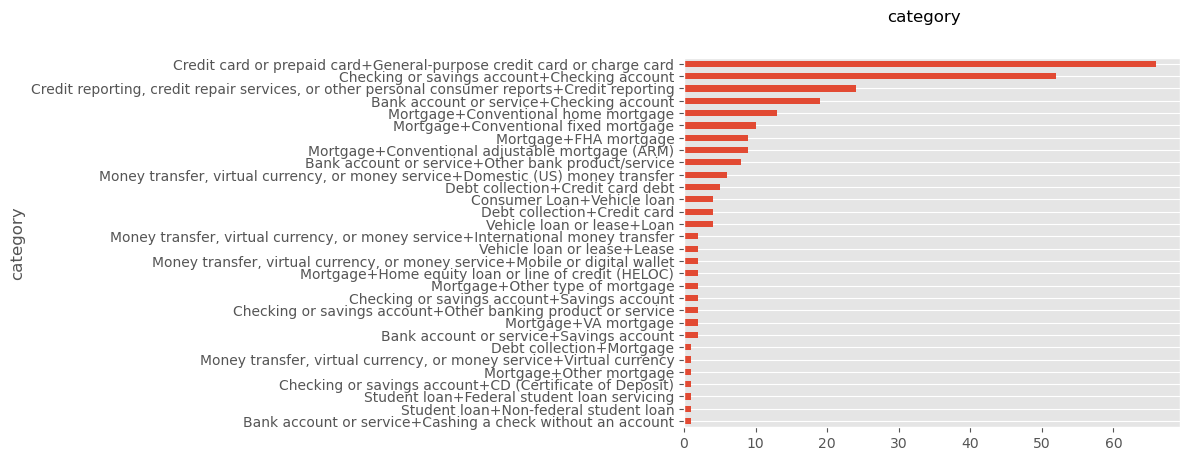

In [64]:
fig, ax = plt.subplots()
fig.suptitle("category", fontsize=12)
df["category"].reset_index().groupby("category").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

## Splitting the dataset into training and testing dataset ##

In [65]:
## Splitting the dataset into traiing and testing dataset ##
df_train, df_test = train_test_split(df_clean, test_size=0.3)
## get target
y_train = df_train["category"].values
y_test = df_test["category"].values

In [66]:
df_train.head(5)

,complaint_text,category,text_clean
4156,My credit card was stolen on XX/XX/XXXX. Charg...,Credit card or prepaid card+General-purpose cr...,credit card stolen charge made beginning 22...
64923,"My lender, Chase sent a check for a perceived ...",Mortgage+FHA mortgage,lender chase sent check perceived overage escr...
30298,JP Morgan Private Bank has engaged in a series...,Bank account or service+Other bank product/ser...,jp morgan private bank engaged series petty ab...
22945,"On XX/XX/XXXX,XX/XX/XXXX, XX/XX/XXXX and XX/XX...","Credit reporting, credit repair services, or o...",chase placed inquiry report even fraud re...
30228,On XXXX I went to my local Chase bank to withd...,Checking or savings account+Checking account,went local chase bank withdrawal money atm tr...


## Baseline ( Bag of words + machine learning)

In [67]:
'''
Features Engineering with vectorizer
Features Selection by p-value
Model Design
Train / Test
Evaluate
Explainability

'''

'\nFeatures Engineering with vectorizer\nFeatures Selection by p-value\nModel Design\nTrain / Test\nEvaluate\nExplainability\n\n'

In [68]:
'''
1. The TF-IDF model (Term Frequency — Inverse Document Frequency) models a text by counting how often a word (called uni-gram), or a combination of two words (two successive words, called bi-gram), or even more (n-gram), appears in the text. 
2. This leads to the “term frequency”. It is then divided by the document frequency, which counts how often a word appears across all entries (i.e. all documents). The last step allows to underweight words which appear more often, and overweight words which appear rarely.
3. The TF-IDF model does not take into account the order of the words (except for two successive words) and belongs therefore to the family of models called “Bag of Words”. We will see later models which take the order of words into account.
4. To convert text into this format, we “vectorize” the text into a vector. When doing this we specify the size of the vocabulary (i.e. the total number of words taken into consideration), and the n-gram range. Then a word (and a word pair in case of bi-grams) is represented by a vector of the size of the vocabulary and has values in only one element, the others being all zero. This is called a one-hot vector.

'''

'\n1. The TF-IDF model (Term Frequency — Inverse Document Frequency) models a text by counting how often a word (called uni-gram), or a combination of two words (two successive words, called bi-gram), or even more (n-gram), appears in the text. \n2. This leads to the “term frequency”. It is then divided by the document frequency, which counts how often a word appears across all entries (i.e. all documents). The last step allows to underweight words which appear more often, and overweight words which appear rarely.\n3. The TF-IDF model does not take into account the order of the words (except for two successive words) and belongs therefore to the family of models called “Bag of Words”. We will see later models which take the order of words into account.\n4. To convert text into this format, we “vectorize” the text into a vector. When doing this we specify the size of the vocabulary (i.e. the total number of words taken into consideration), and the n-gram range. Then a word (and a word p

In [69]:
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer

In [70]:

# Tf-Idf (advanced variant of BoW)
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2), lowercase=False)

In [71]:
# Count (classic BoW)
vectorizer_1 = CountVectorizer(max_features=10000, ngram_range=(1,2), lowercase=False)

In [72]:
## Now I will use the vectorizer on the preprocessed corpus of the train set to extract a vocabulary and create the feature matrix.

corpus = df_train["text_clean"]
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [73]:
X_train

<180x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 23943 stored elements in Compressed Sparse Row format>

In [74]:
dic_vocabulary

{'credit': 2199,
 'card': 1703,
 'stolen': 8274,
 'charge': 1797,
 'made': 3278,
 'beginning': 1584,
 '220000': 149,
 'chase': 1821,
 '24hours': 172,
 'never': 3869,
 'used': 9556,
 'emergency': 2489,
 'vendor': 9613,
 'company': 2046,
 'refused': 7069,
 'give': 2820,
 'information': 3009,
 'ip': 3090,
 'address': 838,
 'local': 3246,
 'law': 3162,
 'busy': 1648,
 'look': 3264,
 'report': 7398,
 'would': 9928,
 'like': 3215,
 'get': 2806,
 'fraudulent': 2744,
 'prevent': 5810,
 'anyone': 1364,
 'else': 2477,
 'wo': 9858,
 'nt': 4136,
 'credit card': 2205,
 'card stolen': 1740,
 'charge made': 1808,
 '220000 chase': 150,
 'chase credit': 1852,
 '24hours never': 173,
 'never used': 3927,
 'used card': 9564,
 'card used': 1744,
 'used emergency': 9570,
 'card company': 1714,
 'refused give': 7077,
 'ip address': 3091,
 'address local': 854,
 'refused look': 7078,
 'report would': 7445,
 'would like': 9950,
 'like get': 3217,
 'address fraudulent': 850,
 'prevent anyone': 5812,
 'wo nt': 9

In [75]:
## The feature matrix X_train has a shape of 34,265 (Number of documents in training) x 10,000 (Length of vocabulary) and it’s pretty sparse:##

In [76]:
sns.heatmap(X_train.todense()[:,np.random.randint(0,X.shape[1],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Sample')

IndexError: tuple index out of range

In [77]:
word = "program"
dic_vocabulary[word]


6027

In [78]:
'''
1. In order to drop some columns and reduce the matrix dimensionality, we can carry out some Feature Selection, the process of selecting a subset of relevant variables. I will proceed as follows:

2. treat each category as binary (for example, the “Tech” category is 1 for the Tech news and 0 for the others);
3. perform a Chi-Square test to determine whether a feature and the (binary) target are independent;
4. keep only the features with a certain p-value from the Chi-Square test.
'''

'\n1. In order to drop some columns and reduce the matrix dimensionality, we can carry out some Feature Selection, the process of selecting a subset of relevant variables. I will proceed as follows:\n\n2. treat each category as binary (for example, the “Tech” category is 1 for the Tech news and 0 for the others);\n3. perform a Chi-Square test to determine whether a feature and the (binary) target are independent;\n4. keep only the features with a certain p-value from the Chi-Square test.\n'

In [79]:
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn import feature_selection 

In [80]:
np.unique([y])

array(['Bank account or service+Cashing a check without an account',
       'Bank account or service+Checking account',
       'Bank account or service+Other bank product/service',
       'Bank account or service+Savings account',
       'Checking or savings account+CD (Certificate of Deposit)',
       'Checking or savings account+Checking account',
       'Checking or savings account+Other banking product or service',
       'Checking or savings account+Savings account',
       'Consumer Loan+Vehicle loan',
       'Credit card or prepaid card+General-purpose credit card or charge card',
       'Credit reporting, credit repair services, or other personal consumer reports+Credit reporting',
       'Debt collection+Credit card', 'Debt collection+Credit card debt',
       'Debt collection+Mortgage',
       'Money transfer, virtual currency, or money service+Domestic (US) money transfer',
       'Money transfer, virtual currency, or money service+International money transfer',
       'Mone

In [81]:
y = df_train["category"].values

In [82]:
from array import *
def array_list(array_num):
    num_list = array_num.tolist() # list
    print(num_list)

In [83]:
y=array_list(df_train["category"])

['Credit card or prepaid card+General-purpose credit card or charge card', 'Mortgage+FHA mortgage', 'Bank account or service+Other bank product/service', 'Credit reporting, credit repair services, or other personal consumer reports+Credit reporting', 'Checking or savings account+Checking account', 'Bank account or service+Checking account', 'Mortgage+Home equity loan or line of credit (HELOC)', 'Credit card or prepaid card+General-purpose credit card or charge card', 'Bank account or service+Cashing a check without an account', 'Credit card or prepaid card+General-purpose credit card or charge card', 'Bank account or service+Checking account', 'Credit card or prepaid card+General-purpose credit card or charge card', 'Checking or savings account+Checking account', 'Bank account or service+Checking account', 'Bank account or service+Checking account', 'Credit card or prepaid card+General-purpose credit card or charge card', 'Mortgage+Other type of mortgage', 'Checking or savings account+

In [84]:
y = df_train["category"].values

In [85]:
y

array(['Credit card or prepaid card+General-purpose credit card or charge card',
       'Mortgage+FHA mortgage',
       'Bank account or service+Other bank product/service',
       'Credit reporting, credit repair services, or other personal consumer reports+Credit reporting',
       'Checking or savings account+Checking account',
       'Bank account or service+Checking account',
       'Mortgage+Home equity loan or line of credit (HELOC)',
       'Credit card or prepaid card+General-purpose credit card or charge card',
       'Bank account or service+Cashing a check without an account',
       'Credit card or prepaid card+General-purpose credit card or charge card',
       'Bank account or service+Checking account',
       'Credit card or prepaid card+General-purpose credit card or charge card',
       'Checking or savings account+Checking account',
       'Bank account or service+Checking account',
       'Bank account or service+Checking account',
       'Credit card or prepaid car

In [86]:
from sklearn.feature_selection import chi2

In [87]:
X_names = vectorizer.get_feature_names()
p_value_limit = 0.90
df_features = pd.DataFrame()
for cat in np.unique(y):
    chi, p = chi2(X_train, y)
    df_features = df_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "y":cat}))
    df_features = df_features.sort_values(["y","score"], 
                    ascending=[True,False])
    df_features = df_features[df_features["score"]>p_value_limit]
X_names = df_features["feature"].unique().tolist()

In [88]:
chi2

<function sklearn.feature_selection._univariate_selection.chi2(X, y)>

In [89]:
X_names

['jpm',
 'jpm chase',
 'deferment',
 'chase co',
 'gave money',
 'theyre',
 'bank fa',
 'fa',
 'jp morganchase',
 'morganchase',
 'co']

In [90]:
for cat in np.unique(y):
    print("# {}:".format(cat))
    print("  . selected features:",len(df_features[df_features["y"]==cat]))
    print("  . top features:", ",".join(df_features[df_features["y"]==cat]["feature"].values[:10]))
    print(" ")
   

# Bank account or service+Cashing a check without an account:
  . selected features: 11
  . top features: jpm,jpm chase,deferment,chase co,gave money,theyre,bank fa,fa,jp morganchase,morganchase
 
# Bank account or service+Checking account:
  . selected features: 11
  . top features: jpm,jpm chase,deferment,chase co,gave money,theyre,bank fa,fa,jp morganchase,morganchase
 
# Bank account or service+Other bank product/service:
  . selected features: 11
  . top features: jpm,jpm chase,deferment,chase co,gave money,theyre,bank fa,fa,jp morganchase,morganchase
 
# Bank account or service+Savings account:
  . selected features: 11
  . top features: jpm,jpm chase,deferment,chase co,gave money,theyre,bank fa,fa,jp morganchase,morganchase
 
# Checking or savings account+CD (Certificate of Deposit):
  . selected features: 11
  . top features: jpm,jpm chase,deferment,chase co,gave money,theyre,bank fa,fa,jp morganchase,morganchase
 
# Checking or savings account+Checking account:
  . selected fe

In [91]:
'''
1.It’s time to train a machine learning model and test it. 
2.I recommend using a Naive Bayes algorithm: 
3.a probabilistic classifier that makes use of Bayes’ Theorem, a rule that uses probability to make predictions based on prior knowledge of conditions that might be related. 
4.This algorithm is the most suitable for such large dataset as it considers each feature independently, calculates the probability of each category, and then predicts the category with the highest probability.
'''

'\n1.It’s time to train a machine learning model and test it. \n2.I recommend using a Naive Bayes algorithm: \n3.a probabilistic classifier that makes use of Bayes’ Theorem, a rule that uses probability to make predictions based on prior knowledge of conditions that might be related. \n4.This algorithm is the most suitable for such large dataset as it considers each feature independently, calculates the probability of each category, and then predicts the category with the highest probability.\n'

In [92]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [93]:
classifier = MultinomialNB()

In [94]:
'''
1.I’m going to train this classifier on the feature matrix and then test it on the transformed test set. 
2.To that end, I need to build a scikit-learn pipeline: a sequential application of a list of transformations and a final estimator. 
3.Putting the Tf-Idf vectorizer and the Naive Bayes classifier in a pipeline allows us to transform and predict test data in just one step.
'''

'\n1.I’m going to train this classifier on the feature matrix and then test it on the transformed test set. \n2.To that end, I need to build a scikit-learn pipeline: a sequential application of a list of transformations and a final estimator. \n3.Putting the Tf-Idf vectorizer and the Naive Bayes classifier in a pipeline allows us to transform and predict test data in just one step.\n'

In [95]:
## pipeline
model = Pipeline([("vectorizer", vectorizer),  
                           ("classifier", classifier)])
## train classifier
model["classifier"].fit(X_train, y_train)
## test
X_test = df_test["text_clean"].values
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)

In [96]:
'''
1. We can now evaluate the performance of the Bag-of-Words model, I will use the following metrics:

2. Accuracy: the fraction of predictions the model got right.

3. Confusion Matrix: a summary table that breaks down the number of correct and incorrect predictions by each class.

4. ROC: a plot that illustrates the true positive rate against the false positive rate at various threshold settings. 
The area under the curve (AUC) indicates the probability that the classifier will rank a randomly chosen positive observation higher than a randomly chosen negative one.

5. Precision: the fraction of relevant instances among the retrieved instances.

6.Recall: the fraction of the total amount of relevant instances that were actually retrieved.

'''

'\n1. We can now evaluate the performance of the Bag-of-Words model, I will use the following metrics:\n\n2. Accuracy: the fraction of predictions the model got right.\n\n3. Confusion Matrix: a summary table that breaks down the number of correct and incorrect predictions by each class.\n\n4. ROC: a plot that illustrates the true positive rate against the false positive rate at various threshold settings. \nThe area under the curve (AUC) indicates the probability that the classifier will rank a randomly chosen positive observation higher than a randomly chosen negative one.\n\n5. Precision: the fraction of relevant instances among the retrieved instances.\n\n6.Recall: the fraction of the total amount of relevant instances that were actually retrieved.\n\n'

Accuracy: 0.38
Detail:
                                                                                               precision    recall  f1-score   support

                                                     Bank account or service+Checking account       0.00      0.00      0.00         6
                                           Bank account or service+Other bank product/service       0.00      0.00      0.00         2
                                                      Bank account or service+Savings account       0.00      0.00      0.00         1
                                                 Checking or savings account+Checking account       0.56      0.50      0.53        18
                                                                   Consumer Loan+Vehicle loan       0.00      0.00      0.00         3
                       Credit card or prepaid card+General-purpose credit card or charge card       0.34      1.00      0.51        21
Credit reporting, credit repair

'\n## Plot roc\nfor i in range(len(classes)):\n    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  \n                           predicted_prob[:,i])\n    ax[0].plot(fpr, tpr, lw=3, \n              label=\'{0} (area={1:0.2f})\'.format(classes[i], \n                              metrics.auc(fpr, tpr))\n               )\nax[0].plot([0,1], [0,1], color=\'navy\', lw=3, linestyle=\'--\')\nax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], \n          xlabel=\'False Positive Rate\', \n          ylabel="True Positive Rate (Recall)", \n          title="Receiver operating characteristic")\nax[0].legend(loc="lower right")\nax[0].grid(True)\n    \n## Plot precision-recall curve\nfor i in range(len(classes)):\n    precision, recall, thresholds = metrics.precision_recall_curve(\n                 y_test_array[:,i], predicted_prob[:,i])\n    ax[1].plot(recall, precision, lw=3, \n               label=\'{0} (area={1:0.2f})\'.format(classes[i], \n                                  metrics.auc(recal

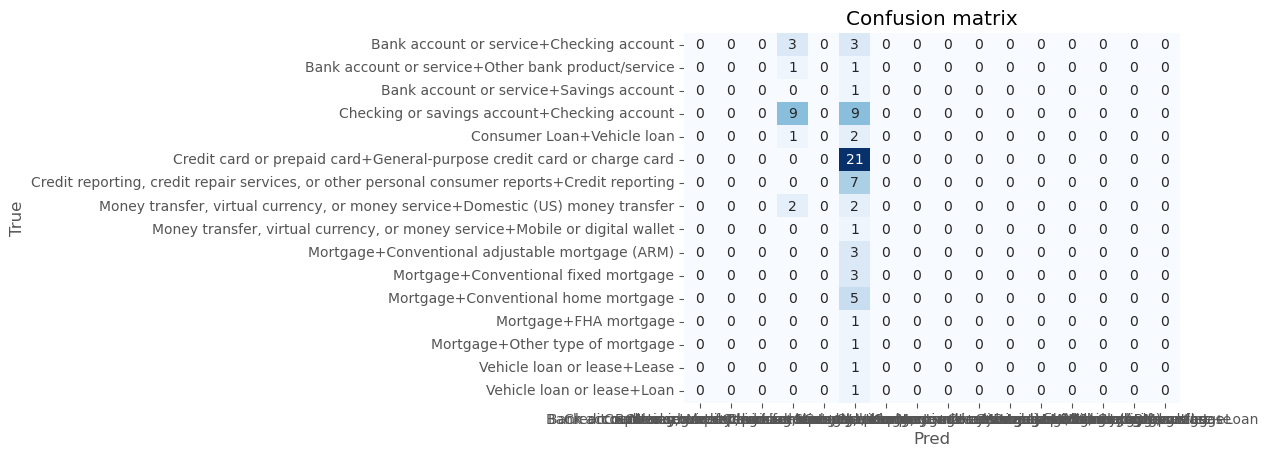

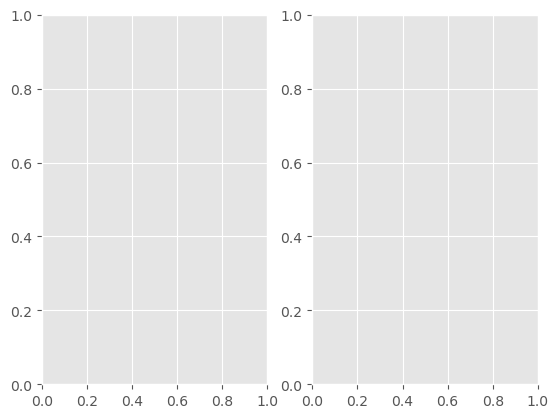

In [97]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = accuracy_score(y_test, predicted)
##auc = roc_auc_score(y_test, predicted_prob,multi_class='ovr')
print("Accuracy:",  round(accuracy,2))
##print("Auc:", round(auc,2))
print("Detail:")
print(classification_report(y_test, predicted))
    
## Plot confusion matrix
cm = confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
'''
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()
'''

## Word Embedding ##

In [98]:
'''
1.Word Embedding is the collective name for feature learning techniques where words from the vocabulary are mapped to vectors of real numbers. 
2.These vectors are calculated from the probability distribution for each word appearing before or after another. 
3.To put it another way, words of the same context usually appear together in the corpus, so they will be close in the vector space as well. 
4.For instance, let’s take the 3 sentences from the previous example:


'''

'\n1.Word Embedding is the collective name for feature learning techniques where words from the vocabulary are mapped to vectors of real numbers. \n2.These vectors are calculated from the probability distribution for each word appearing before or after another. \n3.To put it another way, words of the same context usually appear together in the corpus, so they will be close in the vector space as well. \n4.For instance, let’s take the 3 sentences from the previous example:\n\n\n'

In [99]:
import transformers

# Visualization
import matplotlib
from matplotlib import pyplot as plt

# Text processing
import re
import nltk
import gensim
import gensim.downloader as api

# Various
from datetime import datetime


In [100]:
from gensim.models import Word2Vec
import gensim.downloader as api

In [101]:
nlp = api.load("word2vec-google-news-300")

In [ ]:
## Instead of using a pre-trained model, I am going to fit my own Word2Vec on the training data corpus with gensim. Before fitting the model, the corpus needs to be transformed into a list of lists of n-grams. In this particular case, I’ll try to capture unigrams (“york”), bigrams (“new york”), and trigrams (“new york city”).

In [102]:
corpus = df_train["text_clean"]

## create list of lists of unigrams
lst_corpus = []
for string in corpus:
    
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
    lst_corpus.append(lst_grams)



In [103]:
lst_corpus

[['credit',
  'card',
  'stolen',
  'charge',
  'made',
  'beginning',
  '220000',
  'chase',
  'credit',
  'card',
  '24hours',
  'never',
  'used',
  'card',
  'emergency',
  'card',
  'used',
  'emergency',
  'clinic',
  'vendor',
  'credit',
  'card',
  'company',
  'refused',
  'give',
  'information',
  'ip',
  'address',
  'local',
  'law',
  'enforcement',
  'busy',
  'refused',
  'look',
  'report',
  'would',
  'like',
  'get',
  'ip',
  'address',
  'fraudulent',
  'charger',
  'prevent',
  'anyone',
  'else',
  'wo',
  'nt',
  'anyone',
  'listen'],
 ['lender',
  'chase',
  'sent',
  'check',
  'perceived',
  'overage',
  'escrow',
  'account',
  '140000',
  'escrow',
  'account',
  'went',
  'negative',
  'due',
  'shortage',
  'want',
  'nearly',
  '200000',
  'payment',
  'increase',
  'dollar',
  'month'],
 ['jp',
  'morgan',
  'private',
  'bank',
  'engaged',
  'series',
  'petty',
  'abusive',
  'harassment',
  'year',
  'refused',
  'provide',
  'basic',
  'banking'

In [104]:
'''
When fitting the Word2Vec, you need to specify:

the target size of the word vectors, I’ll use 300;
the window, or the maximum distance between the current and predicted word within a sentence, I’ll use the mean length of text in the corpus;
the training algorithm, I’ll use skip-grams (sg=1) as in general it has better results.
'''

'\nWhen fitting the Word2Vec, you need to specify:\n\nthe target size of the word vectors, I’ll use 300;\nthe window, or the maximum distance between the current and predicted word within a sentence, I’ll use the mean length of text in the corpus;\nthe training algorithm, I’ll use skip-grams (sg=1) as in general it has better results.\n'

In [105]:
## fit w2v
nlp = gensim.models.word2vec.Word2Vec(lst_corpus,vector_size=300,window=8, min_count=1, sg=1, epochs=30)

In [106]:
word = "transaction"
nlp[word].shape

TypeError: 'Word2Vec' object is not subscriptable

In [107]:
## tokenize text
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', 
                     oov_token="NaN", 
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(lst_corpus)
dic_vocabulary = tokenizer.word_index
## create sequence
lst_text2seq= tokenizer.texts_to_sequences(lst_corpus)
## padding sequence
X_train = kprocessing.sequence.pad_sequences(lst_text2seq, 
                    maxlen=15, padding="post", truncating="post")

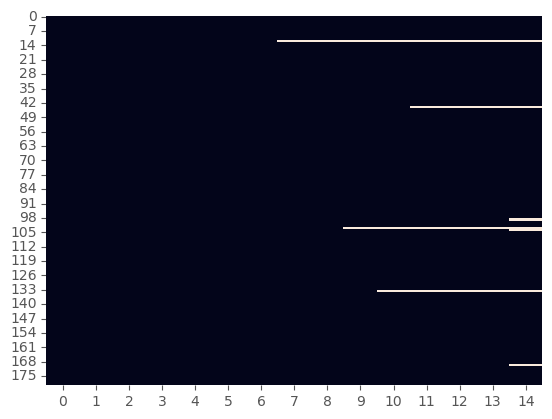

In [108]:
sns.heatmap(X_train==0, vmin=0, vmax=1, cbar=False)
plt.show()

In [109]:
## Every text in the corpus is now an id sequence with length 15. For instance, if a text had 10 tokens in it, then the sequence is composed of 10 ids + 5 0s, which is the padding element (while the id for word not in the vocabulary is 1). Let’s print how a text from the train set has been transformed into a sequence with the padding and the vocabulary.

In [110]:
i = 0

## list of text: ["I like this", ...]
len_txt = len(df_train["text_clean"].iloc[i].split())
print("from: ", df_train["text_clean"].iloc[i], "| len:", len_txt)

## sequence of token ids: [[1, 2, 3], ...]
len_tokens = len(X_train[i])
print("to: ", X_train[i], "| len:", len(X_train[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", df_train["text_clean"].iloc[i].split()[0], 
      " -- idx in vocabulary -->", 
      dic_vocabulary[df_train["text_clean"].iloc[i].split()[0]])

print("vocabulary: ", dict(list(dic_vocabulary.items())[0:5]), "... (padding element, 0)")

from:  credit card stolen  charge made beginning   220000 chase credit card 24hours never used card emergency card used emergency  clinic  vendor credit card company refused give information ip address local law enforcement busy refused look report would like get ip address fraudulent charger prevent anyone else wo nt anyone listen | len: 49
to:  [   6    5  331   20   39  720 2017    2    6    5 2018   21   90    5
 1459] | len: 15
check:  credit  -- idx in vocabulary --> 6
vocabulary:  {'NaN': 1, 'chase': 2, 'account': 3, 'bank': 4, 'card': 5} ... (padding element, 0)


## Before moving on, same feature engineering on the test set as well:##

In [111]:
corpus = df_test["text_clean"]

## create list of n-grams
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, 
                 len(lst_words), 1)]
    lst_corpus.append(lst_grams)

In [112]:
## padding sequence
X_test = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=15,padding="post", truncating="post")

In [113]:
## start the matrix (length of vocabulary x vector size) with all 0s
embeddings = np.zeros((len(dic_vocabulary)+1, 300))
for word,idx in dic_vocabulary.items():
    ## update the row with vector
    try:
        embeddings[idx] =  nlp[word]
    ## if word not in model then skip and the row stays all 0s
    except:
        pass

In [114]:
nlp['transaction']

TypeError: 'Word2Vec' object is not subscriptable

In [115]:
word = "data"
print("dic[word]:", dic_vocabulary[word], "|idx")
print("embeddings[idx]:", embeddings[dic_vocabulary[word]].shape, 
      "|vector")

dic[word]: 2551 |idx
embeddings[idx]: (300,) |vector


In [116]:
'''
1.an Embedding layer that takes the sequences as input and the word vectors as weights, just as described before.
2.A simple Attention layer that won’t affect the predictions but it’s going to capture the weights of each instance and allow us to build a nice explainer .
3.Two layers of Bidirectional LSTM to model the order of words in a sequence in both directions.
4.Two final dense layers that will predict the probability of each news category.
'''

'\n1.an Embedding layer that takes the sequences as input and the word vectors as weights, just as described before.\n2.A simple Attention layer that won’t affect the predictions but it’s going to capture the weights of each instance and allow us to build a nice explainer .\n3.Two layers of Bidirectional LSTM to model the order of words in a sequence in both directions.\n4.Two final dense layers that will predict the probability of each news category.\n'

In [117]:
## code attention layer
def attention_layer(inputs, neurons):
    x = layers.Permute((2,1))(inputs)
    x = layers.Dense(neurons, activation="softmax")(x)
    x = layers.Permute((2,1), name="attention")(x)
    x = layers.multiply([inputs, x])
    return x

## input
x_in = layers.Input(shape=(15,))
## embedding
x = layers.Embedding(input_dim=embeddings.shape[0],  
                     output_dim=embeddings.shape[1], 
                     weights=[embeddings],
                     input_length=15, trainable=False)(x_in)
## apply attention
x = attention_layer(x, neurons=15)
## 2 layers of bidirectional lstm
x = layers.Bidirectional(layers.LSTM(units=15, dropout=0.2, 
                         return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(units=15, dropout=0.2))(x)
## final dense layers
x = layers.Dense(64, activation='relu')(x)
y_out = layers.Dense(32, activation='softmax')(x)
## compile
model = models.Model(x_in, y_out)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 15)           0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 15, 300)      1107900     input_1[0][0]                    
__________________________________________________________________________________________________
permute (Permute)               (None, 300, 15)      0           embedding[0][0]                  
__________________________________________________________________________________________________
dense (Dense)                   (None, 300, 15)      240         permute[0][0]                    
__________________________________________________________________________________________________
attention 

Train on 125 samples, validate on 55 samples
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/10
125/125 [==============================] - 7s 55ms/sample - loss: 3.4657 - acc: 0.0080 - val_loss: 3.4649 - val_acc: 0.0909
Epoch 2/10
125/125 [==============================] - 0s 1ms/sample - loss: 3.4646 - acc: 0.2320 - val_loss: 3.4640 - val_acc: 0.0909
Epoch 3/10
125/125 [==============================] - 0s 1ms/sample - loss: 3.4635 - acc: 0.2320 - val_loss: 3.4632 - val_acc: 0.0909
Epoch 4/10
125/125 [==============================] - 0s 1ms/sample - loss: 3.4624 - acc: 0.2320 - val_loss: 3.4623 - val_acc: 0.0909
Epoch 5/10
125/125 [==============================] - 0s 1ms/sample - loss: 3.4613 - acc: 0.2320 - val_loss: 3.4615 - val_acc: 0.0909
Epoch 6/10
125/125 [==============================] - 0s 1ms/sample - loss: 3.4602 - acc: 0.2320 - val_loss: 3.4606 - val_acc: 0.0909
Epoch 7/10
125/125 [==============================] - 0s 1ms/sample - lo

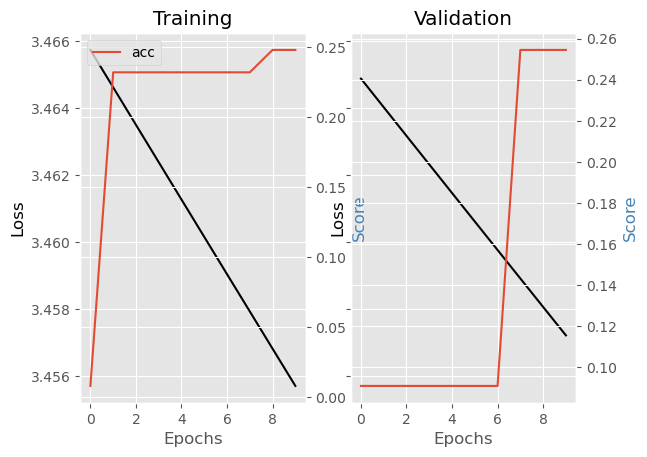

In [118]:
## encode y
dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
y_train = np.array([inverse_dic[y] for y in y_train])
## train
training = model.fit(x=X_train, y=y_train, batch_size=256,epochs=10,validation_split=0.3)
## plot loss and accuracy
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()

## Bert Tokenizer ##

In [133]:
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

ImportError: cannot import name 'BertTokenizer' from 'transformers' (unknown location)

In [122]:
df_clean.head(10)

,complaint_text,category,text_clean
24793,In XX/XX/XXXX I filed for a Chapter XXXX Bankr...,Mortgage+Conventional home mortgage,filed chapter bankruptcy order reorganize fi...
76965,I am writing because I noticed that my report ...,"Credit reporting, credit repair services, or o...",writing noticed report reflecting late payment...
34725,On XX/XX/XXXX I was sent a letter from Chase s...,Credit card or prepaid card+General-purpose cr...,sent letter chase saying autopay credit card ...
24476,My Chase credit card was overcharged for the a...,Credit card or prepaid card+General-purpose cr...,chase credit card overcharged amount 43000 13...
5488,"As attached document illustrates, I currently ...",Mortgage+Conventional home mortgage,attached document illustrates currently arm mo...
5164,I sent in a payment in full to the wrong addre...,"Credit reporting, credit repair services, or o...",sent payment full wrong address via mail came ...
1065,I have asked Chase Bank REPEATEDLY not to let ...,Checking or savings account+Checking account,asked chase bank repeatedly let anyone account...
20461,I took out credit card as a stupid college stu...,Debt collection+Credit card,took credit card stupid college student card h...
24395,BOTH instacart & shipt have charged me each {$...,Credit card or prepaid card+General-purpose cr...,instacart shipt charged 9900 yearly membership...
7102,I am a XXXX year old Private client of XXXX fo...,"Credit reporting, credit repair services, or o...",year old private client 26 year previously p...


In [123]:
df_clean['category'].value_counts()

Credit card or prepaid card+General-purpose credit card or charge card                           66
Checking or savings account+Checking account                                                     52
Credit reporting, credit repair services, or other personal consumer reports+Credit reporting    24
Bank account or service+Checking account                                                         19
Mortgage+Conventional home mortgage                                                              13
Mortgage+Conventional fixed mortgage                                                             10
Mortgage+FHA mortgage                                                                             9
Mortgage+Conventional adjustable mortgage (ARM)                                                   9
Bank account or service+Other bank product/service                                                8
Money transfer, virtual currency, or money service+Domestic (US) money transfer                   6


In [124]:
possible_labels = df_clean.category.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'Mortgage+Conventional home mortgage': 0,
 'Credit reporting, credit repair services, or other personal consumer reports+Credit reporting': 1,
 'Credit card or prepaid card+General-purpose credit card or charge card': 2,
 'Checking or savings account+Checking account': 3,
 'Debt collection+Credit card': 4,
 'Mortgage+Other type of mortgage': 5,
 'Bank account or service+Other bank product/service': 6,
 'Money transfer, virtual currency, or money service+Mobile or digital wallet': 7,
 'Consumer Loan+Vehicle loan': 8,
 'Bank account or service+Checking account': 9,
 'Vehicle loan or lease+Loan': 10,
 'Mortgage+Conventional adjustable mortgage (ARM)': 11,
 'Checking or savings account+Savings account': 12,
 'Checking or savings account+Other banking product or service': 13,
 'Mortgage+Conventional fixed mortgage': 14,
 'Mortgage+VA mortgage': 15,
 'Money transfer, virtual currency, or money service+Domestic (US) money transfer': 16,
 'Money transfer, virtual currency, or money service+Vi

In [125]:
df_clean.head(10)

,complaint_text,category,text_clean
24793,In XX/XX/XXXX I filed for a Chapter XXXX Bankr...,Mortgage+Conventional home mortgage,filed chapter bankruptcy order reorganize fi...
76965,I am writing because I noticed that my report ...,"Credit reporting, credit repair services, or o...",writing noticed report reflecting late payment...
34725,On XX/XX/XXXX I was sent a letter from Chase s...,Credit card or prepaid card+General-purpose cr...,sent letter chase saying autopay credit card ...
24476,My Chase credit card was overcharged for the a...,Credit card or prepaid card+General-purpose cr...,chase credit card overcharged amount 43000 13...
5488,"As attached document illustrates, I currently ...",Mortgage+Conventional home mortgage,attached document illustrates currently arm mo...
5164,I sent in a payment in full to the wrong addre...,"Credit reporting, credit repair services, or o...",sent payment full wrong address via mail came ...
1065,I have asked Chase Bank REPEATEDLY not to let ...,Checking or savings account+Checking account,asked chase bank repeatedly let anyone account...
20461,I took out credit card as a stupid college stu...,Debt collection+Credit card,took credit card stupid college student card h...
24395,BOTH instacart & shipt have charged me each {$...,Credit card or prepaid card+General-purpose cr...,instacart shipt charged 9900 yearly membership...
7102,I am a XXXX year old Private client of XXXX fo...,"Credit reporting, credit repair services, or o...",year old private client 26 year previously p...


In [126]:
df_clean['label'] = df_clean.category.replace(label_dict)

In [127]:
df_clean.head(10)

,complaint_text,category,text_clean,label
24793,In XX/XX/XXXX I filed for a Chapter XXXX Bankr...,Mortgage+Conventional home mortgage,filed chapter bankruptcy order reorganize fi...,0
76965,I am writing because I noticed that my report ...,"Credit reporting, credit repair services, or o...",writing noticed report reflecting late payment...,1
34725,On XX/XX/XXXX I was sent a letter from Chase s...,Credit card or prepaid card+General-purpose cr...,sent letter chase saying autopay credit card ...,2
24476,My Chase credit card was overcharged for the a...,Credit card or prepaid card+General-purpose cr...,chase credit card overcharged amount 43000 13...,2
5488,"As attached document illustrates, I currently ...",Mortgage+Conventional home mortgage,attached document illustrates currently arm mo...,0
5164,I sent in a payment in full to the wrong addre...,"Credit reporting, credit repair services, or o...",sent payment full wrong address via mail came ...,1
1065,I have asked Chase Bank REPEATEDLY not to let ...,Checking or savings account+Checking account,asked chase bank repeatedly let anyone account...,3
20461,I took out credit card as a stupid college stu...,Debt collection+Credit card,took credit card stupid college student card h...,4
24395,BOTH instacart & shipt have charged me each {$...,Credit card or prepaid card+General-purpose cr...,instacart shipt charged 9900 yearly membership...,2
7102,I am a XXXX year old Private client of XXXX fo...,"Credit reporting, credit repair services, or o...",year old private client 26 year previously p...,1


In [128]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df_clean.index.values, 
                                                  df_clean.label.values, 
                                                  test_size=0.15, 
                                                  random_state=42)

In [129]:
df_clean['data_type'] = ['not_set']*df_clean.shape[0]

df_clean.loc[X_train, 'data_type'] = 'train'
df_clean.loc[X_val, 'data_type'] = 'val'

In [130]:
df_clean.groupby(['category', 'label', 'data_type']).count()

complaint_text  \
category                                           label data_type                   
Bank account or service+Cashing a check without... 19    train                   1   
Bank account or service+Checking account           9     train                  16   
                                                         val                     3   
Bank account or service+Other bank product/service 6     train                   6   
                                                         val                     2   
Bank account or service+Savings account            28    train                   2   
Checking or savings account+CD (Certificate of ... 27    train                   1   
Checking or savings account+Checking account       3     train                  44   
                                                         val                     8   
Checking or savings account+Other banking produ... 13    train                   2   
Checking or savings account+Savings account        12    train                   2   
Consumer Loan+Vehicle loan                         8     train                   4   
Credit card or prepaid card+General-purpose cre... 2     train                  58   
                                                         val                     8   
Credit reporting, credit repair services, or ot... 1     train                  20   
                                                         val                     4   
Debt collection+Credit card                        4     train                   4   
Debt collection+Credit card debt                   20    train                   4   
                                                         val                     1   
Debt collection+Mortgage                           25    train                   1   
Money transfer, virtual currency, or money serv... 16    train                   3   
                                                         val                     3   
Money transfer, virtual currency, or money serv... 29    train                   1   
                                                         val                     1   
Money transfer, virtual currency, or money serv... 7     train                   2   
Money transfer, virtual currency, or money serv... 17    train                   1   
Mortgage+Conventional adjustable mortgage (ARM)    11    train                   8   
                                                         val                     1   
Mortgage+Conventional fixed mortgage               14    train                  10   
Mortgage+Conventional home mortgage                0     train                   9   
                                                         val                     4   
Mortgage+FHA mortgage                              23    train                   8   
                                                         val                     1   
Mortgage+Home equity loan or line of credit (HE... 22    train                   1   
                                                         val                     1   
Mortgage+Other mortgage                            26    train                   1   
Mortgage+Other type of mortgage                    5     train                   1   
                                                         val                     1   
Mortgage+VA mortgage                               15    train                   2   
Student loan+Federal student loan servicing        21    train                   1   
Student loan+Non-federal student loan              18    val                     1   
Vehicle loan or lease+Lease                        24    train                   2   
Vehicle loan or lease+Loan                         10    train                   4   

                                                                    text_clean  
category                                           label data_type              
Bank account or service+Cashing a c

In [131]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

NameError: name 'BertTokenizer' is not defined

In [132]:
encoded_data_train = tokenizer.encode_plus(
    df_clean[df_clean.data_type=='train'].text_clean.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256
    ##return_tensors='pt'
)

encoded_data_val = tokenizer.encode_plus(
    df_clean[df_clean.data_type=='val'].text_clean.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256
    ##return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df_clean[df_clean.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df_clean[df_clean.data_type=='val'].label.values)

AttributeError: 'Tokenizer' object has no attribute 'encode_plus'

In [ ]:
df_clean.head(10)

In [ ]:
df_clean_modified = df_clean[['text_clean','category']]

In [ ]:
df_clean_modified

In [ ]:
df_clean.label.unique()

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_clean_modified['text_clean'],df_clean_modified['category'],test_size=0.3,random_state=40)

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

from tabulate import tabulate
from tqdm import trange
import random

In [ ]:
df_clean.head(10)

In [ ]:
## We extract text and label values ##
text = df_clean.text_clean.values
labels = df_clean.label.values

In [ ]:
## Preprocessing ##
tokenizer = BertTokenizer.from_pretrained(
    'bert-base-uncased',
    do_lower_case = True
    )

In [ ]:
def print_rand_sentence():
    
    '''Displays the tokens and respective IDs of a random text sample'''
    index = random.randint(0, len(text)-1)
    table = np.array([tokenizer.tokenize(text[index]), 
                    tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text[index]))]).T
    print(tabulate(table,
                 headers = ['Tokens', 'Token IDs'],
                 tablefmt = 'fancy_grid'))

In [ ]:
print_rand_sentence()

In [ ]:
'''
1. BERT¹ (Bidirectional Encoder Representations from Transformers) is a Machine Learning model based on transformers², i.e. attention components able to learn contextual relations between words.
2. The Natural Language Processing (NLP) community can leverage powerful tools like BERT in (at least) two ways:
3. 
Feature-based approach
1.1 Download a pre-trained BERT model.
1.2 Use BERT to turn natural language sentences into a vector representation.
1.3 Feed the pre-trained vector representations into a model for a downstream task (such as text classification).
4. Perform fine-tuning
2.1 Download a pre-trained BERT model.
2.2 Update the model weights on the downstream task.
'''

In [ ]:
'''
Add special tokens:
- [CLS]: at the beginning of each sentence (ID 101)
- [SEP]: at the end of each sentence (ID 102)
Make sentences of the same length:
- This is achieved by padding, i.e. adding values of convenience to shorter sequences to match the desired length. Longer sequences are truncated.
- The padding ([PAD]) tokens have ID 0.
- The maximum sequence length allowed is of 512 tokens¹.
Create an attention mask:
- List of 0/1 indicating whether the model should consider the tokens or not when learning their contextual representation. We expect [PAD] tokens to have value 0.
The process can be represented as follows:


Image by author.
We can perform all the needed steps by using the tokenizer.encode_plus⁷ method. When called, it returns a transformers.tokenization.tokenization-utils_base.BatchEncoding object with the following fields:

input_ids: list of token IDs.
token_type_ids: list of token type IDs.
attention_mask: list of 0/1 indicating which tokens should be considered by the model (return_attention_mask = True).
As we choose max_length = 32, longer sentences will be truncated, while shorter sentences will be populated with [PAD] tokens (id: 0) until they reach the desired length.

Note: the idea of using the tokenizer.encode_plus method (plus the code for it) was borrowed from this post: BERT Fine-Tuning Tutorial with PyTorch⁸ by Chris McCormick and Nick Ryan.


We can observe the token IDs for a text sample and recognize the presence of the special tokens [CLS] and [SEP], as well as the padding [PAD] up to the desired max_length:

token_id[6]

Image by author.
We can also verify the output of tokenizer.encode_plus by inspecting tokens, their IDs and the attention mask for random text samples as follows:



Image by author.
Note: BERT is a model with absolute position embeddings, so it is usually advised to pad the inputs on the right (end of the sequence) rather than the left (beginning of the sequence). In our case, tokenizer.encode_plus takes care of the needed preprocessing.

5. Data split
We split the dataset into train (80%) and validation (20%) sets, and wrap them around a torch.utils.data.DataLoader object. With its intuitive syntax, DataLoader provides an iterable over the given dataset.

More information on DataLoader can be found here:

Datasets & DataLoader — Pytorch Tutorials⁹
DataLoader Documentation¹⁰

6. Train
It is time for the fine-tuning task:

Select hyperparameters based on the recommendations from the BERT paper¹:
The optimal hyperparameter values are task-specific, but we found the following range of possible values to work well across all tasks:

- Batch size: 16, 32

- Learning rate (Adam): 5e-5, 3e-5, 2e-5

- Number of epochs: 2, 3, 4

Define some functions to assess validation metrics (accuracy, precision, recall and specificity) during the training process:

Image by author.

Download transformers.BertForSequenceClassification¹¹, which is a BERT model with a linear layer for sentence classification (or regression) on top of the pooled output:

Note: it is preferable to run this notebook in the presence of GPU. In order to execute it on CPU, we should comment model.cuda() in the above snippet to avoid a runtime error.

Perform the training procedure:


Training logs. Image by author.
7. Predict
After a training procedure, it is a good practice to assess the model’s performances on a test set. For the purpose of this example, we simply predict the class (ham vs. spam) of a new text sample:



8. Conclusions
In this post, we performed the fine-tuning of BERT for a classification task. We shared code snippets that can be easily copied and executed on Google Colab (or other environments).

Deep Learning frameworks are already equipped with implementations of popular NLP transformers like BERT. TensorFlow and PyTorch provide a set of pre-trained models as well as intuitive APIs to ease their adoption and perform fine-tuning tasks. Moreover, AI communities like Hugging Face⁴ make possible to access large model hubs and straightforward interfaces to work with.

We conclude by sharing useful resources where to find more examples and information related to the topic:

TensorFlow Tutorial: Fine-Tuning a BERT model¹²
BERT models on TensorFlow Hub¹³
PyTorch Transformers¹⁴
Hugging Face: Transformers Notebooks¹⁵
Hugging Face: Model Hub¹⁶
BERT Fine-Tuning Tutorial with PyTorch⁸: the use of tokenizer.encode_plus was borrowed from this post.
A Visual Guide to Using BERT for the First Time¹⁷ by Jay Alammar.
In a previous post¹⁸, we also used BERT in a multi-class text classification task with TensorFlow.

'''

In [ ]:
'''
1. We can perform all the needed steps by using the tokenizer.encode_plus⁷ method. When called, it returns a transformers.tokenization.tokenization-utils_base.BatchEncoding object with the following fields
2. input_ids: list of token IDs.
token_type_ids: list of token type IDs.
attention_mask: list of 0/1 indicating which tokens should be considered by the model (return_attention_mask = True).
'''

In [ ]:
'''
As we choose max_length = 32, longer sentences will be truncated, while shorter sentences will be populated with [PAD] tokens (id: 0) until they reach the desired length.

Note: the idea of using the tokenizer.encode_plus method (plus the code for it) was borrowed from this post: BERT Fine-Tuning Tutorial with PyTorch⁸ by Chris McCormick and Nick Ryan.
'''

In [ ]:
token_id = []
attention_masks = []

def preprocessing(input_text, tokenizer):
  '''
  Returns <class transformers.tokenization_utils_base.BatchEncoding> with the following fields:
    - input_ids: list of token ids
    - token_type_ids: list of token type ids
    - attention_mask: list of indices (0,1) specifying which tokens should considered by the model (return_attention_mask = True).
  '''
  return tokenizer.encode_plus(
                        input_text,
                        add_special_tokens = True,
                        max_length = 32,
                        pad_to_max_length = 120,
                        return_attention_mask = True,
                        return_tensors = 'pt'
                   )


for sample in text:
    encoding_dict = preprocessing(sample, tokenizer)
    token_id.append(encoding_dict['input_ids']) 
    attention_masks.append(encoding_dict['attention_mask'])
    
    
token_id = torch.cat(token_id, dim = 0)
attention_masks = torch.cat(attention_masks, dim = 0)
labels = torch.tensor(labels)  

In [ ]:
'''
1. We can observe the token IDs for a text sample and recognize the presence of the special tokens [CLS] and [SEP], 
2. as well as the padding [PAD] up to the desired max_length:
'''



In [ ]:
token_id[6]

In [ ]:
## We can also verify the output of tokenizer.encode_plus by inspecting tokens, their IDs and the attention mask for random text samples

In [ ]:
def print_rand_sentence_encoding():
    
    '''Displays tokens, token IDs and attention mask of a random text sample'''
    index = random.randint(0, len(text) - 1)
    tokens = tokenizer.tokenize(tokenizer.decode(token_id[index]))
    token_ids = [i.numpy() for i in token_id[index]]
    attention = [i.numpy() for i in attention_masks[index]]

    table = np.array([tokens, token_ids, attention]).T
    print(tabulate(table, 
                 headers = ['Tokens', 'Token IDs', 'Attention Mask'],
                 tablefmt = 'fancy_grid'))

print_rand_sentence_encoding()

In [ ]:
### Note: BERT is a model with absolute position embeddings, so it is usually advised to pad the inputs on the right (end of the sequence) rather than the left (beginning of the sequence). In our case, tokenizer.encode_plus takes care of the needed preprocessing.###

In [ ]:
## Data Split ##
'''
1.We split the dataset into train (80%) and validation (20%) sets, and wrap them around a torch.utils.data.DataLoader object. With its intuitive syntax, DataLoader provides an iterable over the given dataset.

2.More information on DataLoader can be found here:

3.Datasets & DataLoader — Pytorch Tutorials⁹
4. DataLoader Documentation¹⁰
'''

In [ ]:
val_ratio = 0.2
# Recommended batch size: 16, 32. See: https://arxiv.org/pdf/1810.04805.pdf
batch_size = 16

# Indices of the train and validation splits stratified by labels
train_idx, val_idx = train_test_split(
    np.arange(len(labels)),
    test_size = val_ratio,
    shuffle = True)
    ##stratify = labels)

# Train and validation sets
train_set = TensorDataset(token_id[train_idx], 
                          attention_masks[train_idx], 
                          labels[train_idx])

val_set = TensorDataset(token_id[val_idx], 
                        attention_masks[val_idx], 
                        labels[val_idx])

# Prepare DataLoader
train_dataloader = DataLoader(
            train_set,
            sampler = RandomSampler(train_set),
            batch_size = batch_size
        )

validation_dataloader = DataLoader(
            val_set,
            sampler = SequentialSampler(val_set),
            batch_size = batch_size
        )

## Training the dataset ##

In [ ]:
def b_tp(preds, labels):
    
    '''Returns True Positives (TP): count of correct predictions of actual class 1'''
    return sum([preds == labels and preds == 1 for preds, labels in zip(preds, labels)])

def b_fp(preds, labels):
    
    '''Returns False Positives (FP): count of wrong predictions of actual class 1'''
    return sum([preds != labels and preds == 1 for preds, labels in zip(preds, labels)])

def b_tn(preds, labels):
    
    '''Returns True Negatives (TN): count of correct predictions of actual class 0'''
    return sum([preds == labels and preds == 0 for preds, labels in zip(preds, labels)])

def b_fn(preds, labels):
    
    '''Returns False Negatives (FN): count of wrong predictions of actual class 0'''
    return sum([preds != labels and preds == 0 for preds, labels in zip(preds, labels)])

def b_metrics(preds, labels):
    
    '''
    Returns the following metrics:
    - accuracy    = (TP + TN) / N
    - precision   = TP / (TP + FP)
    - recall      = TP / (TP + FN)
    - specificity = TN / (TN + FP)
    '''
    preds = np.argmax(preds, axis = 1).flatten()
    
    labels = labels.flatten()
    tp = b_tp(preds, labels)
    tn = b_tn(preds, labels)
    fp = b_fp(preds, labels)
    fn = b_fn(preds, labels)
    b_accuracy = (tp + tn) / len(labels)
    b_precision = tp / (tp + fp) if (tp + fp) > 0 else 'nan'
    b_recall = tp / (tp + fn) if (tp + fn) > 0 else 'nan'
    b_specificity = tn / (tn + fp) if (tn + fp) > 0 else 'nan'
    return b_accuracy, b_precision, b_recall, b_specificity

In [ ]:
'''
Download transformers.BertForSequenceClassification¹¹, which is a BERT model with a linear layer for sentence classification (or regression) on top of the pooled output:
'''


In [ ]:
print(torch.__version__)

In [ ]:
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels = 2,
    output_attentions = False,
    output_hidden_states = False,
)

# Recommended learning rates (Adam): 5e-5, 3e-5, 2e-5. See: https://arxiv.org/pdf/1810.04805.pdf
optimizer = torch.optim.AdamW(model.parameters(), 
                              lr = 5e-5,
                              eps = 1e-08
                              )

# Run on GPU
model.cuda()